In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data2=pd.read_csv("/content/CWC23_all_innings.csv")

In [24]:
data2.shape

(1437, 20)

In [35]:
data2.head(10)

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.050000,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.50,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.050000,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.50,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.050000,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.80,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.050000,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.050000,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.90,1,NaN,NaN,NaN,NaN,NaN
5,AFG,Mujeeb Ur Rahman (AFG),bowl,60,51,3.0,0.050000,0.850000,v England,Delhi,15-Oct-23,10.0,1.0,5.10,2,NaN,NaN,NaN,NaN,NaN
6,ENG,AU Rashid (ENG),bowl,48,54,3.0,0.062500,1.125000,v Netherlands,Pune,8-Nov-23,8.0,0.0,6.75,2,NaN,NaN,NaN,NaN,NaN
7,NED,LV van Beek (NED),bowl,53,60,3.0,0.056604,1.132075,v South Africa,Dharamsala,17-Oct-23,8.5,0.0,6.79,2,NaN,NaN,NaN,NaN,NaN
8,BAN,Mehidy Hasan Miraz (BAN),bowl,54,60,3.0,0.055556,1.111111,v Pakistan,Eden Gardens,31-Oct-23,9.0,0.0,6.66,2,NaN,NaN,NaN,NaN,NaN
9,PAK,Mohammad Wasim (1) (PAK),bowl,60,60,3.0,0.050000,1.000000,v New Zealand,Bengaluru,4-Nov-23,10.0,0.0,6.00,1,NaN,NaN,NaN,NaN,NaN


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1437 entries, 0 to 1436
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1437 non-null   object 
 1   player           1437 non-null   object 
 2   bat_or_bowl      1437 non-null   object 
 3   bb_bf            1437 non-null   int64  
 4   runs             1437 non-null   int64  
 5   wkts             574 non-null    float64
 6   wicketball_prob  1437 non-null   float64
 7   runs_per_ball    1437 non-null   float64
 8   opposition       1437 non-null   object 
 9   ground           1437 non-null   object 
 10  start_date       1437 non-null   object 
 11  overs            574 non-null    float64
 12  mdns             574 non-null    float64
 13  econ             574 non-null    float64
 14  inns             1437 non-null   int64  
 15  4s               863 non-null    float64
 16  6s               863 non-null    float64
 17  sr            

In [37]:

# Calculate total runs, total wickets, and average economy rate for each team
total_teams=data2.groupby('team')['player'].sum()
total_runs = data2.groupby('team')['runs'].sum()
total_wickets = data2.groupby('team')['wkts'].sum()
average_economy_rate = data2.groupby('team')['econ'].mean()

# Create a DataFrame to summarize team statistics
team_summary = pd.DataFrame({
    'Teams list ':total_teams,
    'Total Runs': total_runs,
    'Total Wickets': total_wickets,
    'Average Economy Rate': average_economy_rate
})

print(team_summary)

                                            Teams list   Total Runs  \
team                                                                  
AFG   Noor Ahmad (AFG)Mujeeb Ur Rahman (AFG)Mohammad...        4134   
AUS   A Zampa (AUS)MR Marsh (AUS)PJ Cummins (AUS)GJ ...        5694   
BAN   Mehidy Hasan Miraz (BAN)Shoriful Islam (BAN)Ta...        4358   
ENG   DJ Willey (ENG)AU Rashid (ENG)RJW Topley (ENG)...        4396   
IND   Kuldeep Yadav (IND)Mohammed Shami (IND)JJ Bumr...        5245   
NED   LV van Beek (NED)BFW de Leede (NED)BFW de Leed...        4268   
NZ    MJ Henry (NZ)LH Ferguson (NZ)TA Boult (NZ)GD P...        5376   
PAK   Shaheen Shah Afridi (PAK)Mohammad Wasim (1) (P...        4786   
SA    G Coetzee (SA)G Coetzee (SA)KA Maharaj (SA)L N...        5097   
SL    D Madushanka (SL)AD Mathews (SL)AD Mathews (SL...        4366   

      Total Wickets  Average Economy Rate  
team                                       
AFG            53.0              5.763818  
AUS            

In [43]:


# a. Average runs scored per match in the Cricket World Cup 2023 tournament
average_runs_per_match = data2['runs'].mean()

print("The average runs scored per match in the Cricket World Cup 2023 tournament is: {average_runs_per_match:.2f}")

# b. Top three leading wicket-takers in the Cricket World Cup 2023
top_wicket_takers = data2.groupby('player')['wkts'].sum().nlargest(3)

print("Top three leading wicket-takers in the Cricket World Cup 2023:")
print(top_wicket_takers)

# c. Team with the highest batting average in the Cricket World Cup 2023
teams_batting_average =data2.groupby('team')['runs'].mean().sort_values(ascending=False)

print("The team with the highest batting average in the Cricket World Cup 2023 is: {teams_batting_average.idxmax()}")
print(teams_batting_average)
# d. Highest individual score made by a player in a single match during the Cricket World Cup 2023
highest_individual_score = data2['runs'].max()

print("The highest individual score in a single match during the Cricket World Cup 2023 is: {highest_individual_score}")
print(highest_individual_score)

The average runs scored per match in the Cricket World Cup 2023 tournament is: {average_runs_per_match:.2f}
Top three leading wicket-takers in the Cricket World Cup 2023:
player
Mohammed Shami (IND)    24.0
A Zampa (AUS)           23.0
D Madushanka (SL)       21.0
Name: wkts, dtype: float64
The team with the highest batting average in the Cricket World Cup 2023 is: {teams_batting_average.idxmax()}
team
IND    37.464286
PAK    37.390625
NZ     37.333333
SA     36.148936
AUS    33.892857
AFG    32.046512
SL     31.637681
BAN    30.907801
ENG    29.112583
NED    27.184713
Name: runs, dtype: float64
The highest individual score in a single match during the Cricket World Cup 2023 is: {highest_individual_score}
201


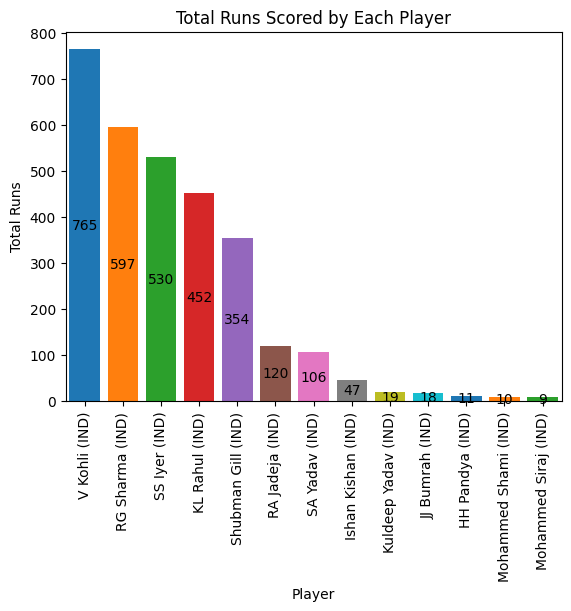

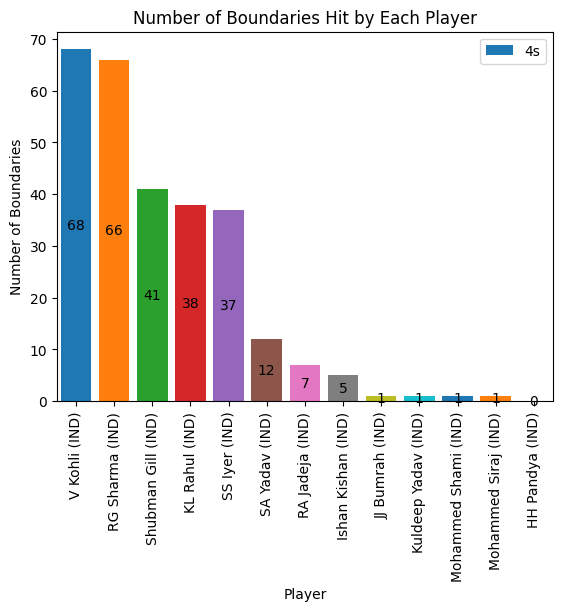

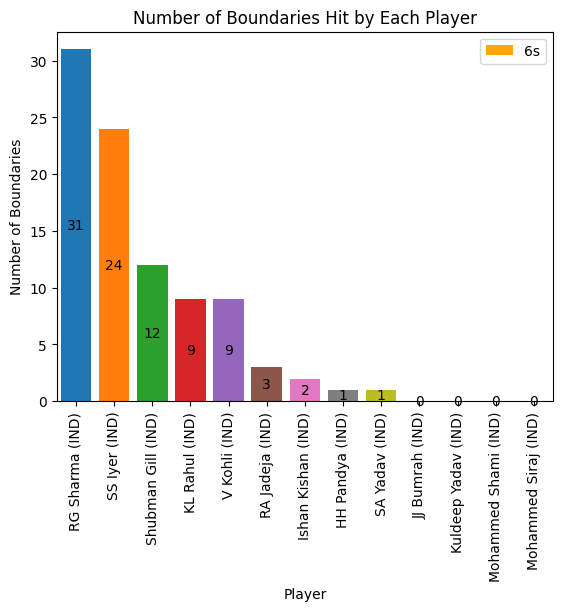

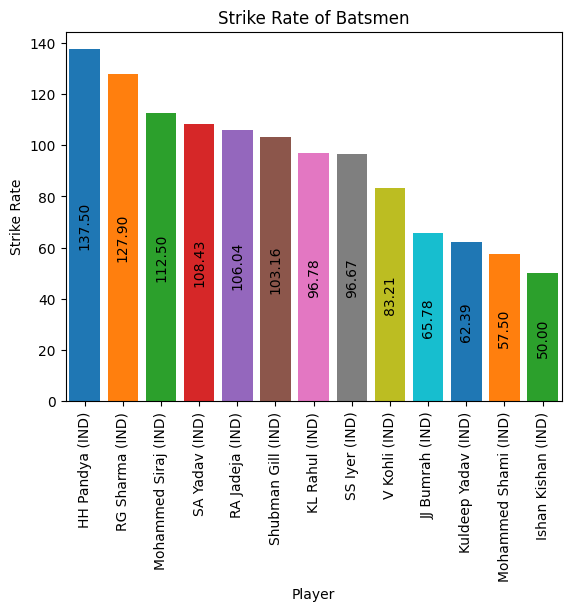

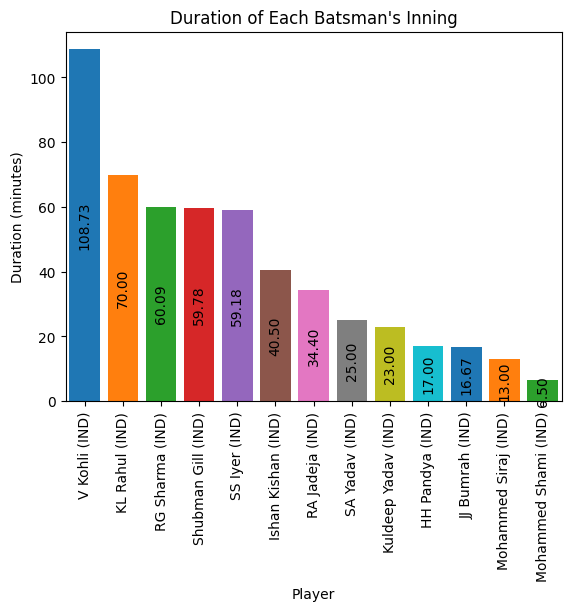

In [14]:
batting_data = data2[data2['bat_or_bowl'] == 'bat']
team_data = batting_data[batting_data['team'] == 'IND']

total_runs_by_player = team_data.groupby('player')['runs'].sum()
total_runs_by_player = total_runs_by_player.sort_values(ascending=False)
total_runs_by_player.plot(kind='bar')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored by Each Player')
for i, v in enumerate(total_runs_by_player):
    plt.bar_label(plt.bar(x=i, height=v), label=str(v), label_type='center')
plt.show()

total_4s_by_player = team_data.groupby('player')['4s'].sum()
total_4s_by_player = total_4s_by_player.sort_values(ascending=False)
total_4s_by_player.plot(kind='bar', label='4s')
plt.xlabel('Player')
plt.ylabel('Number of Boundaries')
plt.title('Number of Boundaries Hit by Each Player')
plt.legend()
for i, v in enumerate(total_4s_by_player):
    plt.bar_label(plt.bar(x=i, height=v), label=str(v), label_type='center')
plt.show()

total_6s_by_player = team_data.groupby('player')['6s'].sum()
total_6s_by_player = total_6s_by_player.sort_values(ascending=False)
total_6s_by_player.plot(kind='bar', label='6s', color='orange')
plt.xlabel('Player')
plt.ylabel('Number of Boundaries')
plt.title('Number of Boundaries Hit by Each Player')
plt.legend()
for i, v in enumerate(total_6s_by_player):
    plt.bar_label(plt.bar(x=i, height=v), label=str(v), label_type='center')
plt.show()

strike_rate_by_player = team_data.groupby('player')['sr'].mean()
strike_rate_by_player = strike_rate_by_player.sort_values(ascending=False)
strike_rate_by_player.plot(kind='bar')
plt.xlabel('Player')
plt.ylabel('Strike Rate')
plt.title('Strike Rate of Batsmen')
for i, v in enumerate(strike_rate_by_player):
    plt.bar_label(plt.bar(x=i, height=v), labels=[f'{v:.2f}'], label_type='center', rotation='vertical')
plt.show()

duration_by_player = team_data.groupby('player')['mins'].mean()
duration_by_player = duration_by_player.sort_values(ascending=False)
duration_by_player.plot(kind='bar')
plt.xlabel('Player')
plt.ylabel('Duration (minutes)')
plt.title("Duration of Each Batsman's Inning")
for i, v in enumerate(duration_by_player):
    plt.bar_label(plt.bar(x=i, height=v), labels=[f'{v:.2f}'], label_type='center', rotation='vertical')
plt.show()

In [28]:
a = ['AUS']
filtered_data = data2[data2['team'].isin(a)]

In [17]:
b=['IND']
b_2 = data2[data2['team'].isin(b)]

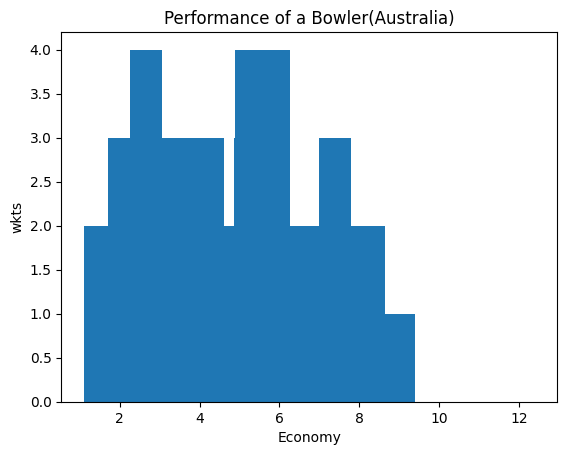

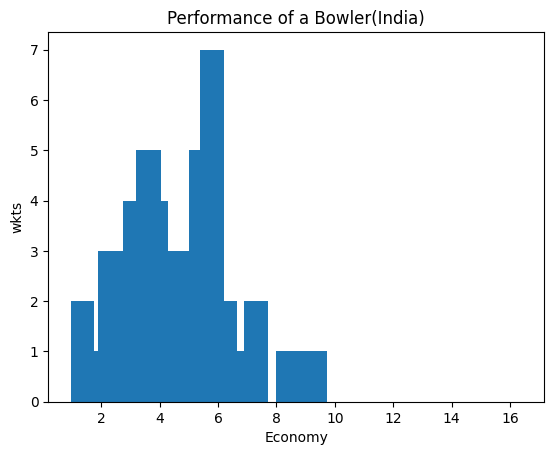

In [18]:
econ = filtered_data["econ"]
wkts = filtered_data["wkts"]
plt.bar(econ, wkts)
plt.xlabel("Economy")
plt.ylabel("wkts")
plt.title("Performance of a Bowler(Australia)")
plt.show()

econ = b_2["econ"]
wkts = b_2["wkts"]
plt.bar(econ, wkts)
plt.xlabel("Economy")
plt.ylabel("wkts")
plt.title("Performance of a Bowler(India)")
plt.show()



In [49]:
maidens = data2["mdns"]
economy_rate = data2["econ"]
wicket_prob = data2["wicketball_prob"]
wickets =  data2["wkts"]


0    0.0
1    2.0
2    1.0
3    0.0
4    0.0
Name: mdns, dtype: float64

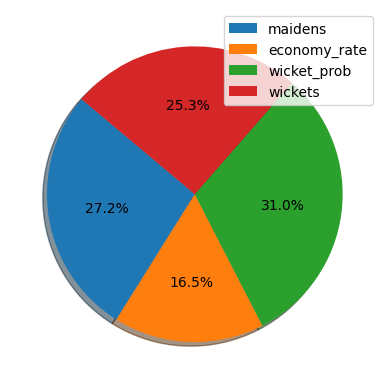

In [74]:
filtered_data = data2[data2['team'].isin([b])]
labels = ["maidens","economy_rate","wicket_prob","wickets"]
size =[215,130,245, 200]
plt.pie( size,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels,loc='upper right')
plt.show()

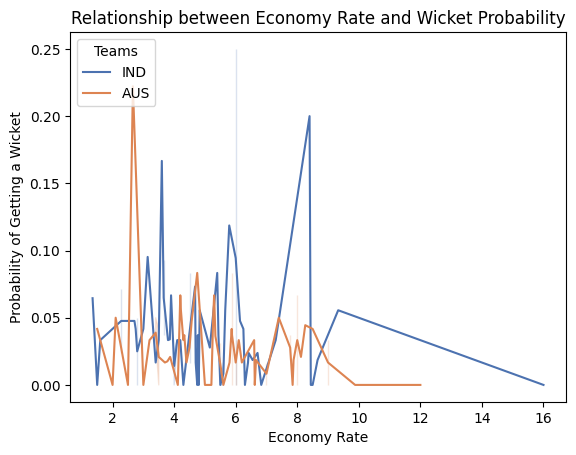

In [73]:
filtered_data = data2[data2['team'].isin(['IND', 'AUS'])]


sns.lineplot(data=filtered_data, x="econ", y="wicketball_prob", hue='team',palette='deep', hue_order=['IND','AUS'])

plt.legend(title='Teams', loc='upper left')  # You can change the location as needed
plt.xlabel('Economy Rate')
plt.ylabel('Probability of Getting a Wicket')
plt.title('Relationship between Economy Rate and Wicket Probability')
plt.show()